In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

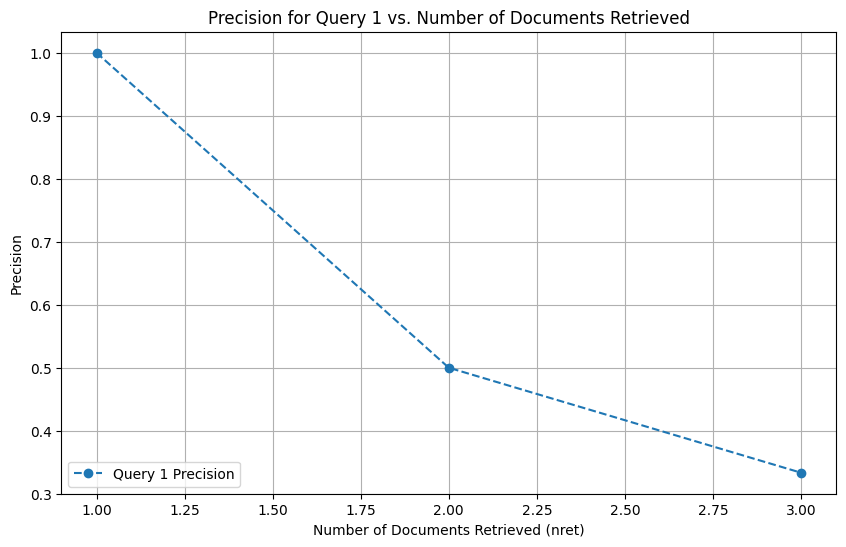

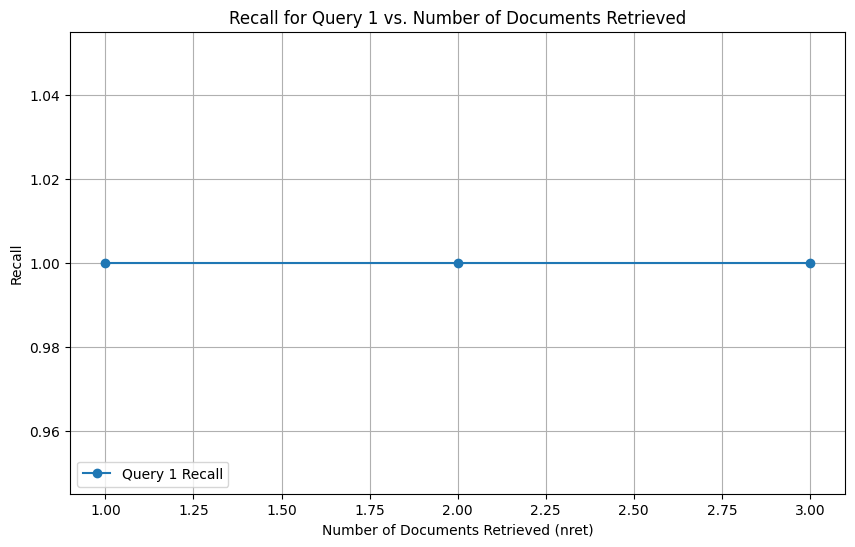

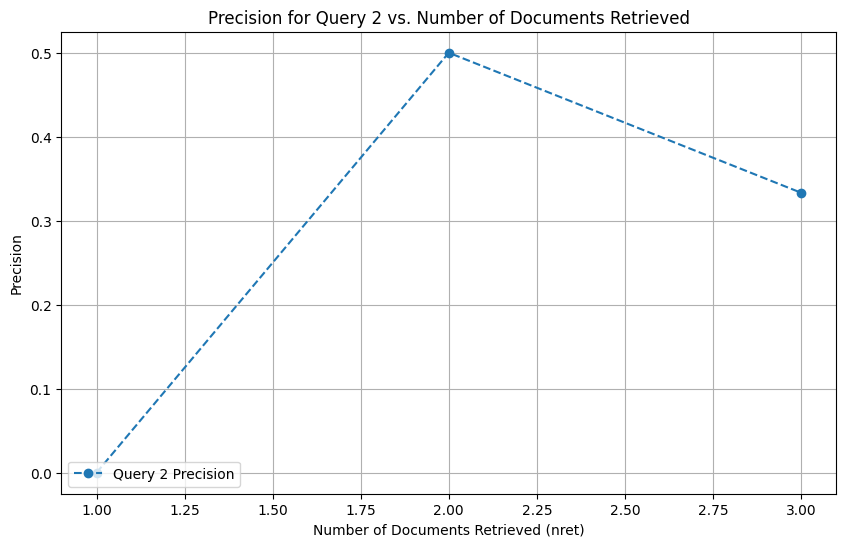

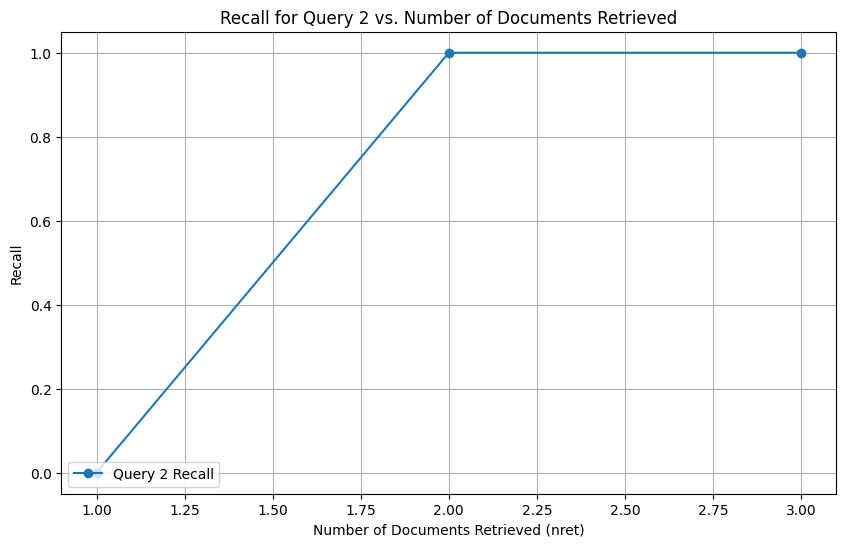

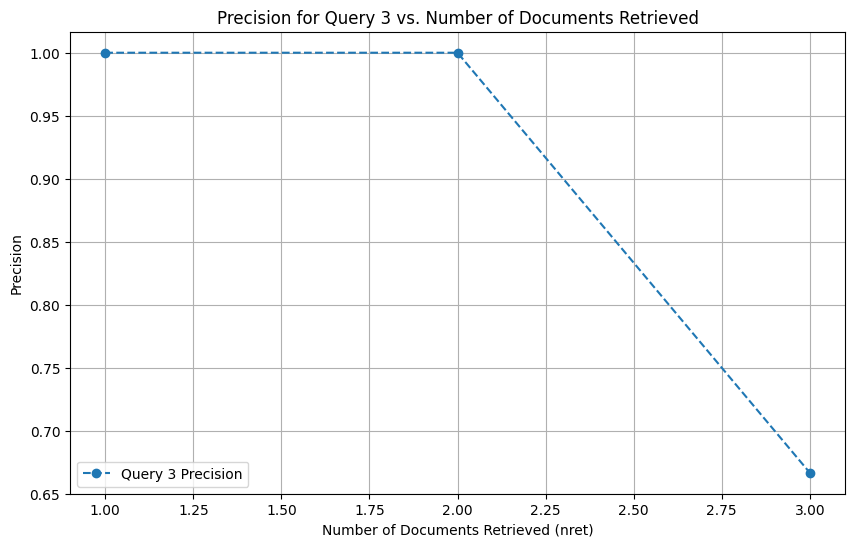

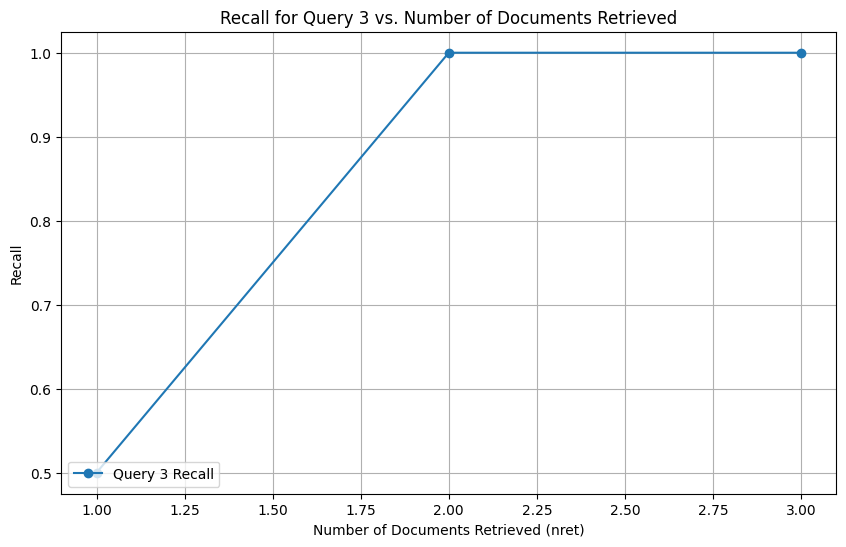

In [ ]:
# Define term-document vectors for each document
document_vectors = {
    "The Dark Knight": np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    "The Joker": np.array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
    "The Matrix": np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]),
}

# Define term-document vectors for each query
query_vectors = {
    "Query 1": np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]),
    "Query 2": np.array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    "Query 3": np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0]),
}

# Define relevant documents for each query (1 for relevant, 0 for irrelevant)
relevant_documents = {
    "Query 1": ["The Matrix"],  # Relevant documents for Query 1
    "Query 2": ["The Joker"],   # Relevant documents for Query 2
    "Query 3": ["The Dark Knight", "The Joker"],  # Relevant documents for Query 3
}

# Calculate cosine similarity between each query and each document
def compute_cosine_similarity(query_vectors, document_vectors):
    results = {}
    for query_name, query_vector in query_vectors.items():
        query_results = {}
        for doc_name, doc_vector in document_vectors.items():
            # Compute cosine similarity between query and document
            similarity = cosine_similarity([query_vector], [doc_vector])[0][0]
            query_results[doc_name] = similarity
        results[query_name] = query_results
    return results

# Calculate precision and recall for each number of returned documents
def calculate_precision_recall_at_n(similarities, relevant_documents):
    n_documents = len(next(iter(similarities.values())))  # Number of documents (same for each query)
    
    # For each nret (1, 2, 3, ..., n_documents), calculate precision and recall for each query
    precision_per_query = {}
    recall_per_query = {}

    for query_name in similarities.keys():
        precision_n = []
        recall_n = []
        
        for nret in range(1, n_documents + 1):
            sorted_docs = sorted(similarities[query_name].items(), key=lambda x: x[1], reverse=True)
            sorted_docs = [doc for doc, _ in sorted_docs]
            
            # Top nret documents
            retrieved_docs = sorted_docs[:nret]
            
            # Calculate precision and recall for this query
            retrieved_relevant = sum([1 for doc in retrieved_docs if doc in relevant_documents[query_name]])
            precision = retrieved_relevant / nret
            recall = retrieved_relevant / len(relevant_documents[query_name])
            
            precision_n.append(precision)
            recall_n.append(recall)
        
        precision_per_query[query_name] = precision_n
        recall_per_query[query_name] = recall_n
    
    return precision_per_query, recall_per_query

# Get cosine similarities
similarities = compute_cosine_similarity(query_vectors, document_vectors)

# Calculate precision and recall for each query and each nret
precision_per_query, recall_per_query = calculate_precision_recall_at_n(similarities, relevant_documents)

# Plot Precision and Recall for all queries at each nret
def plot_precision_recall_for_all_queries(precision_per_query, recall_per_query):
    # Plot Precision for all queries
    plt.figure(figsize=(10, 6))
    for query_name in precision_per_query:
        plt.plot(range(1, len(precision_per_query[query_name]) + 1), precision_per_query[query_name], label=f'{query_name} Precision', marker='o', linestyle='--')
    plt.xlabel('Number of Documents Retrieved (nret)')
    plt.ylabel('Precision')
    plt.title('Precision for All Queries vs. Number of Documents Retrieved')
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

    # Plot Recall for all queries
    plt.figure(figsize=(10, 6))
    for query_name in recall_per_query:
        plt.plot(range(1, len(recall_per_query[query_name]) + 1), recall_per_query[query_name], label=f'{query_name} Recall', marker='o', linestyle='-')
    plt.xlabel('Number of Documents Retrieved (nret)')
    plt.ylabel('Recall')
    plt.title('Recall for All Queries vs. Number of Documents Retrieved')
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

# Call the plotting function
plot_precision_recall_for_all_queries(precision_per_query, recall_per_query)
